In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [2]:
plt.rcParams.update({'font.size':16})

## Q2.) ABC

In [3]:
data = pd.read_pickle('data/data_ps6.pkl')
xs = data[0]
ys = data[1]

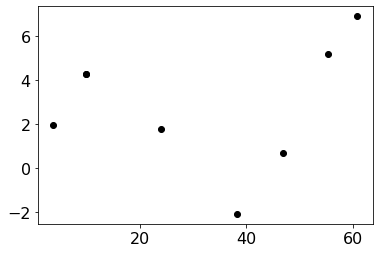

In [4]:
plt.plot(xs, ys, 'ko')

In [5]:
n_x = len(xs)

In [6]:
def matern(t_ar1, t_ar2, sigma, tau):
    dt = np.abs(np.expand_dims(t_ar1, axis = 1) - t_ar2)
    return sigma**2*(1 + np.sqrt(3)*dt/tau)*np.exp(-np.sqrt(3)*dt/tau)


def jeffry(n, p_min, p_max):
    p_rand = np.random.rand(n,2)
    alpha = np.log(p_max/p_min)
    return p_min*np.exp(alpha*p_rand)


def flat(n, p_min, p_max):
    p_rand = np.random.rand(n,2)
    alpha = p_max - p_min
    return p_min + alpha*p_rand

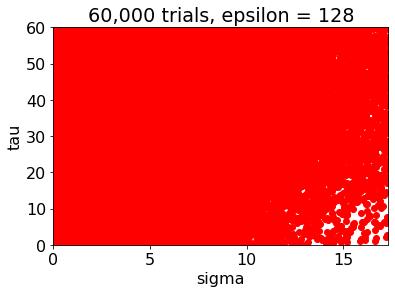

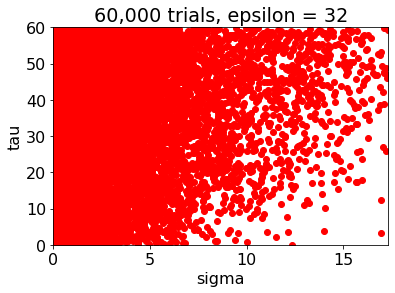

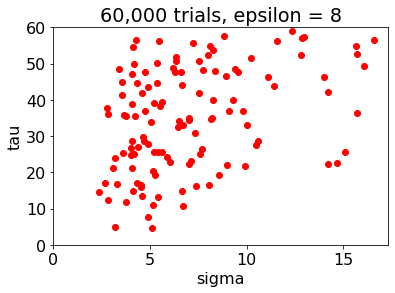

In [7]:
repeat = 3
trials = 60000
epsilon = 512

sig_min_ar = np.zeros(repeat+1)
sig_max_ar = np.zeros(repeat+1)

tau_min_ar = np.zeros(repeat+1)
tau_max_ar = np.zeros(repeat+1)

sig_min_ar[0] = 0
sig_max_ar[0] = np.sqrt(300)


tau_max_ar[0] = 60
tau_min_ar[0] = 0


for i in range(repeat):
    p = flat(trials, np.array([sig_min_ar[i], tau_min_ar[i]]), 
                     np.array([sig_max_ar[i], tau_max_ar[i]]))
    
    dist = np.zeros(trials)

    for j in range(trials):
        cov = matern(xs, xs, *p[j])
        y_draw = np.random.multivariate_normal(np.zeros(n_x), cov)
        
        dist[j] = np.sum((y_draw - ys)**2)
    
    
    p_accept = p[dist<=epsilon]
    
    
   
    #sig_min_ar[i+1] = np.percentile(p_accept[:,0], 0)
    sig_min_ar[i+1] = sig_min_ar[0]
    
    #sig_max_ar[i+1] = np.percentile(p_accept[:,0], 100)
    sig_max_ar[i+1] = sig_max_ar[0]
    

    #tau_min_ar[i+1] = np.percentile(p_accept[:,1], 0)
    tau_min_ar[i+1] = tau_min_ar[0]
    
    #tau_max_ar[i+1] = np.percentile(p_accept[:,1], 100)
    tau_max_ar[i+1] = tau_max_ar[0]
    
    epsilon /= 4
    
    plt.figure()
    plt.plot(p_accept[:,0], p_accept[:,1], "ro")
    plt.xlabel("sigma")
    plt.ylabel("tau")
    plt.xlim(sig_min_ar[0], sig_max_ar[0])
    plt.ylim(tau_min_ar[0], tau_max_ar[0])
    plt.title(f"60,000 trials, epsilon = {int(epsilon)}")
    

## Q2.) Neural Network

In [8]:
df_t = pd.read_pickle('data/ap17_xpcont_train.pickle')
df_v = pd.read_pickle('data/ap17_xpcont_validation.pickle')

df_t.keys()

dict_keys(['bp_coef', 'rp_coef', 'labels'])

In [9]:
n_spec = len(df_t['bp_coef'][0])
n_train = len(df_t['bp_coef'])
n_valid = len(df_v['bp_coef'])

norm_t = np.expand_dims(df_t['rp_coef'][:,0], axis = 1)
norm_v = np.expand_dims(df_v['rp_coef'][:,0], axis = 1)

#bias_t = np.ones((n_train, 1))
bp_train = df_t['bp_coef']/norm_t
rp_train = df_t['rp_coef']/norm_t

bias_v = np.ones((n_valid,1))
bp_valid = df_v['bp_coef']/norm_v
rp_valid = df_v['rp_coef']/norm_v

pars_t = np.concatenate([bp_train, rp_train], axis = 1)
pars_v = np.concatenate([bp_valid, rp_valid], axis = 1)

In [10]:
nn = MLPRegressor(random_state=1, max_iter=500, 
                  hidden_layer_sizes = (128,128,128), 
                  verbose = True,
                  learning_rate = 'adaptive',
                  learning_rate_init = .01)

# 3 hidden layers with 128 nodes each
# RELU activation and ADAM optimizer

In [11]:
sol = nn.fit(pars_t, df_t['labels'][:,0])

Iteration 1, loss = 9587628.69844188
Iteration 2, loss = 1705803.07844470
Iteration 3, loss = 205487.06025765
Iteration 4, loss = 46226.39884854
Iteration 5, loss = 32569.64840749
Iteration 6, loss = 28533.47059924
Iteration 7, loss = 25915.81957892
Iteration 8, loss = 24008.87897979
Iteration 9, loss = 22466.50769786
Iteration 10, loss = 21118.81358983
Iteration 11, loss = 20084.39599703
Iteration 12, loss = 19011.90394678
Iteration 13, loss = 18254.50276277
Iteration 14, loss = 17351.57983946
Iteration 15, loss = 16540.80329341
Iteration 16, loss = 15856.37088897
Iteration 17, loss = 15318.46168345
Iteration 18, loss = 14772.30895770
Iteration 19, loss = 14235.82087006
Iteration 20, loss = 13902.91824983
Iteration 21, loss = 13494.19909114
Iteration 22, loss = 13093.91142167
Iteration 23, loss = 12788.61543411
Iteration 24, loss = 12487.89203682
Iteration 25, loss = 12229.11694683
Iteration 26, loss = 12059.61154611
Iteration 27, loss = 11840.53912537
Iteration 28, loss = 11678.55346

Iteration 232, loss = 5454.55061609
Iteration 233, loss = 4774.45841285
Iteration 234, loss = 4432.52283524
Iteration 235, loss = 4385.43860449
Iteration 236, loss = 4645.60339219
Iteration 237, loss = 4406.40428982
Iteration 238, loss = 4335.21164246
Iteration 239, loss = 4353.23788644
Iteration 240, loss = 4668.90480803
Iteration 241, loss = 4264.84766025
Iteration 242, loss = 4205.72303114
Iteration 243, loss = 4256.84709968
Iteration 244, loss = 4490.78203963
Iteration 245, loss = 4304.69118758
Iteration 246, loss = 4437.96751191
Iteration 247, loss = 4549.27307489
Iteration 248, loss = 4412.98333406
Iteration 249, loss = 4480.27198212
Iteration 250, loss = 5128.08544694
Iteration 251, loss = 4459.99574028
Iteration 252, loss = 4845.00865650
Iteration 253, loss = 4416.40912821
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [12]:
pred = sol.predict(pars_v)
err_nn = np.abs((pred - df_v['labels'][:,0])/df_v['labels'][:,0])

Median Absolute Deviation of T_eff: 0.934%


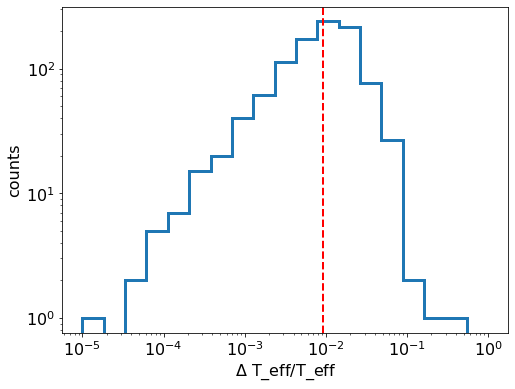

In [13]:
teff_med_nn = np.median(err_nn)

plt.figure(figsize = (8,6))
plt.hist(err_nn, bins = np.logspace(-5,0,20), histtype = 'step', lw = 3)
plt.axvline(teff_med_nn, color = 'r', linestyle = '--', lw = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta$ T_eff/T_eff')
plt.ylabel('counts');
print(f'Median Absolute Deviation of T_eff: %.3g%%'%(teff_med_nn*100))

Compared to linear regression (MAD 1.14%), Neural Network is only marginally better at MAD 0.93%